# Linear Regression Analysis: Does Accommodating More Guests Increase Revenue?

In this analysis, we explore the hypothesis:

> **"Listings that accommodate more guests earn significantly more revenue."**

We use NYC Airbnb data and a simple linear regression to model the relationship between the number of guests a listing can accommodate (`accommodates`) and the estimated revenue over the past 365 days (`estimated_revenue_l365d`).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load data
file_path = "nyc_airbnb_cleaned.csv"  # Replace this with your own local path if needed
df = pd.read_csv(file_path)

# Drop rows with missing values for the variables we care about
df_accom = df[['accommodates', 'estimated_revenue_l365d']].dropna()

In [4]:
# Define independent (X) and dependent (y) variables
X = df_accom['accommodates'].values.reshape(-1, 1)
y = df_accom['estimated_revenue_l365d'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [6]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
slope = model.coef_[0][0]
intercept = model.intercept_[0]

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Slope: 3060.809057053571
Intercept: 4819.231776193717
Mean Squared Error: 892714067.7844888
R-squared: 0.04630006968836575


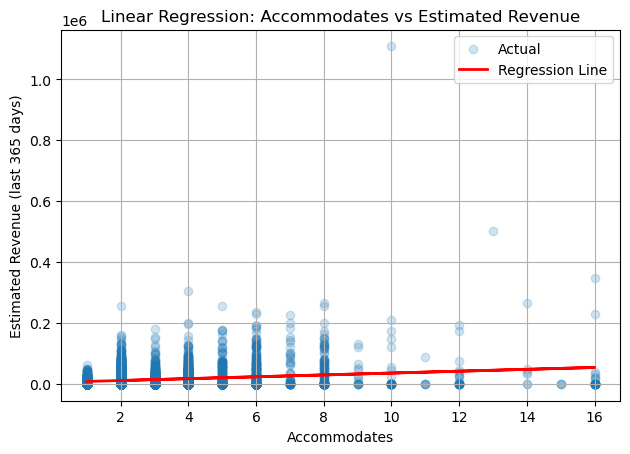

In [7]:
# Plot results
plt.scatter(X_test, y_test, alpha=0.2, label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Accommodates')
plt.ylabel('Estimated Revenue (last 365 days)')
plt.title('Linear Regression: Accommodates vs Estimated Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 📊 Results Summary:
- **Slope:** Each additional guest a listing can accommodate is associated with **$3,060 more in estimated annual revenue**.
- **Intercept:** A listing with capacity for one guest is expected to make ~$4,819 annually.
- **R² Score:** 0.046 → The model explains about 4.6% of the variance in revenue, which is modest but better than other predictors like review count.

### 💡 Conclusion:
This supports the hypothesis that **larger listings earn more**, though other variables also play a big role. Hosts may benefit from increasing sleeping capacity to boost earnings.